In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('md_product_processed.xlsx')

/home/emphas_ai/Documents/PYTHON_APPLICATION/PythonProject1/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
sample_df = df.head(50)
sample_df.to_csv('input_data.csv', index = False)

In [4]:
df.to_csv('master_data.csv', index = False)

In [5]:
inference = df.head(1)
inference

ID DIVISION_SHORT_DESCR SUB_DIVISION_SHORT_DESCR  BUSINESS_SEGMENT HFGR  \
0   0                  PSS                       PS                18    A   

  HFGR_SHORT_DESCR  FGR   FGR_DESC MPI_TYPE PRODUCT_FAMILY  ...     TEST  \
0        Trench LV  A8N  102083_16   Device            75V  ...  GTBF_CN   

          PPOS MAIN_FAMILY ENDTHICKNESS_PRAS_MIN PRWF_RASTER_X PRWF_RASTER_Y  \
0  IRFB7734PBF        12.7                 200.0         3.658         5.969   

  MBFS_FRONTEND_QTY PRWF_CHIP_SIZE  MANUFACTURING_ROUTE VERSION  
0                 1      21.834602                    2       1  

[1 rows x 50 columns]

In [6]:
json_result = inference.to_json(orient='records')
json_result

'[{"ID":0,"DIVISION_SHORT_DESCR":"PSS","SUB_DIVISION_SHORT_DESCR":"PS","BUSINESS_SEGMENT":18,"HFGR":"A","HFGR_SHORT_DESCR":"Trench LV","FGR":"A8N","FGR_DESC":"102083_16","MPI_TYPE":"Device","PRODUCT_FAMILY":"75V","APPLICATION":"Power Tools; MS","TECHNOLOGY":"PT","PROCESSCLASS":"FET_TRENCH","PROCESSGROUP":"FET12_7","SALES_NAME":"IRFB7734PBF","MSAI_SP_SAP_MATNR":"SP001565862","DC_MDPR_MD_PROCESS":"PIO","MBNO_FP_SAP_MATNR":"MA005825769","DC_BNR_MAX":99514971,"BASIC_TYPE_BE":"P2844X","MPK_PACKAGE_PLATFORM":"TO","PACKAGE_FAMILY_PROCESSED":"TO220","DC_V_SNR_SERIAL_NO":"F0017","PACKAGENAME":"PG-TO220-3-904","QA_MILESTONE":"M9","QUALITY_REQ_CATEGORY":"STANDARD","MRFP_PPC":"STANDARD","M8_RELEASE_DATE":"2024-03-14","M9_RELEASE_DATE":"2024-07-27","MSAI_FUNCTIONAL_SAFETY":null,"MSAI_PRODUCT_STATUS_INFO":"not for new design","BE_PVG_VALID_FROM":"2023-09-14","BE_PVG_VALID_TO":"2099-12-31","FP_FAC_PVG_MR":"MA005825769_WAVCND_M2_2","BASIC_TYPE_DB":"P2844D","TOTAL_CHIPS_PROCESSED":1,"MULTICHIP_PROCESSE

In [7]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
df_encoded = df.copy()  # Make a copy to avoid modifying the original dataframe

for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

print("Encoded DataFrame:")
print(df_encoded.head())

Encoded DataFrame:
   ID  DIVISION_SHORT_DESCR  SUB_DIVISION_SHORT_DESCR  BUSINESS_SEGMENT  HFGR  \
0   0                     2                         8                18     8   
1   1                     1                         1                14    10   
2   2                     2                         7                12    19   
3   3                     2                         8                18     8   
4   4                     2                         8                18     8   

   HFGR_SHORT_DESCR   FGR  FGR_DESC  MPI_TYPE  PRODUCT_FAMILY  ...  TEST  \
0               152  2254       608         2              65  ...    20   
1               128  1234      3821         2              13  ...    26   
2                80  4052       295         4             376  ...    21   
3               152  2566      4194         2              67  ...    22   
4               152  2389       777         2              57  ...    20   

   PPOS  MAIN_FAMILY  ENDTHICKNESS_PR

In [8]:
df_encoded = df_encoded.fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
print(X_scaled)

[[-1.73201421  0.75527032  0.35019415 ...  0.72597747 -0.03377042
   0.        ]
 [-1.73194102 -0.41379566 -1.94026059 ... -0.47181564  0.4526531
   0.        ]
 [-1.73186784  0.75527032  0.02298633 ... -0.62517221  1.42550013
   0.        ]
 ...
 [ 1.73186784  0.75527032  0.35019415 ...  1.29851742  0.4526531
   0.        ]
 [ 1.73194102 -1.58286164 -0.30422149 ... -0.43328293 -0.52019393
   0.        ]
 [ 1.73201421  0.75527032  0.35019415 ... -0.75904146 -0.03377042
   0.        ]]


<Axes: >

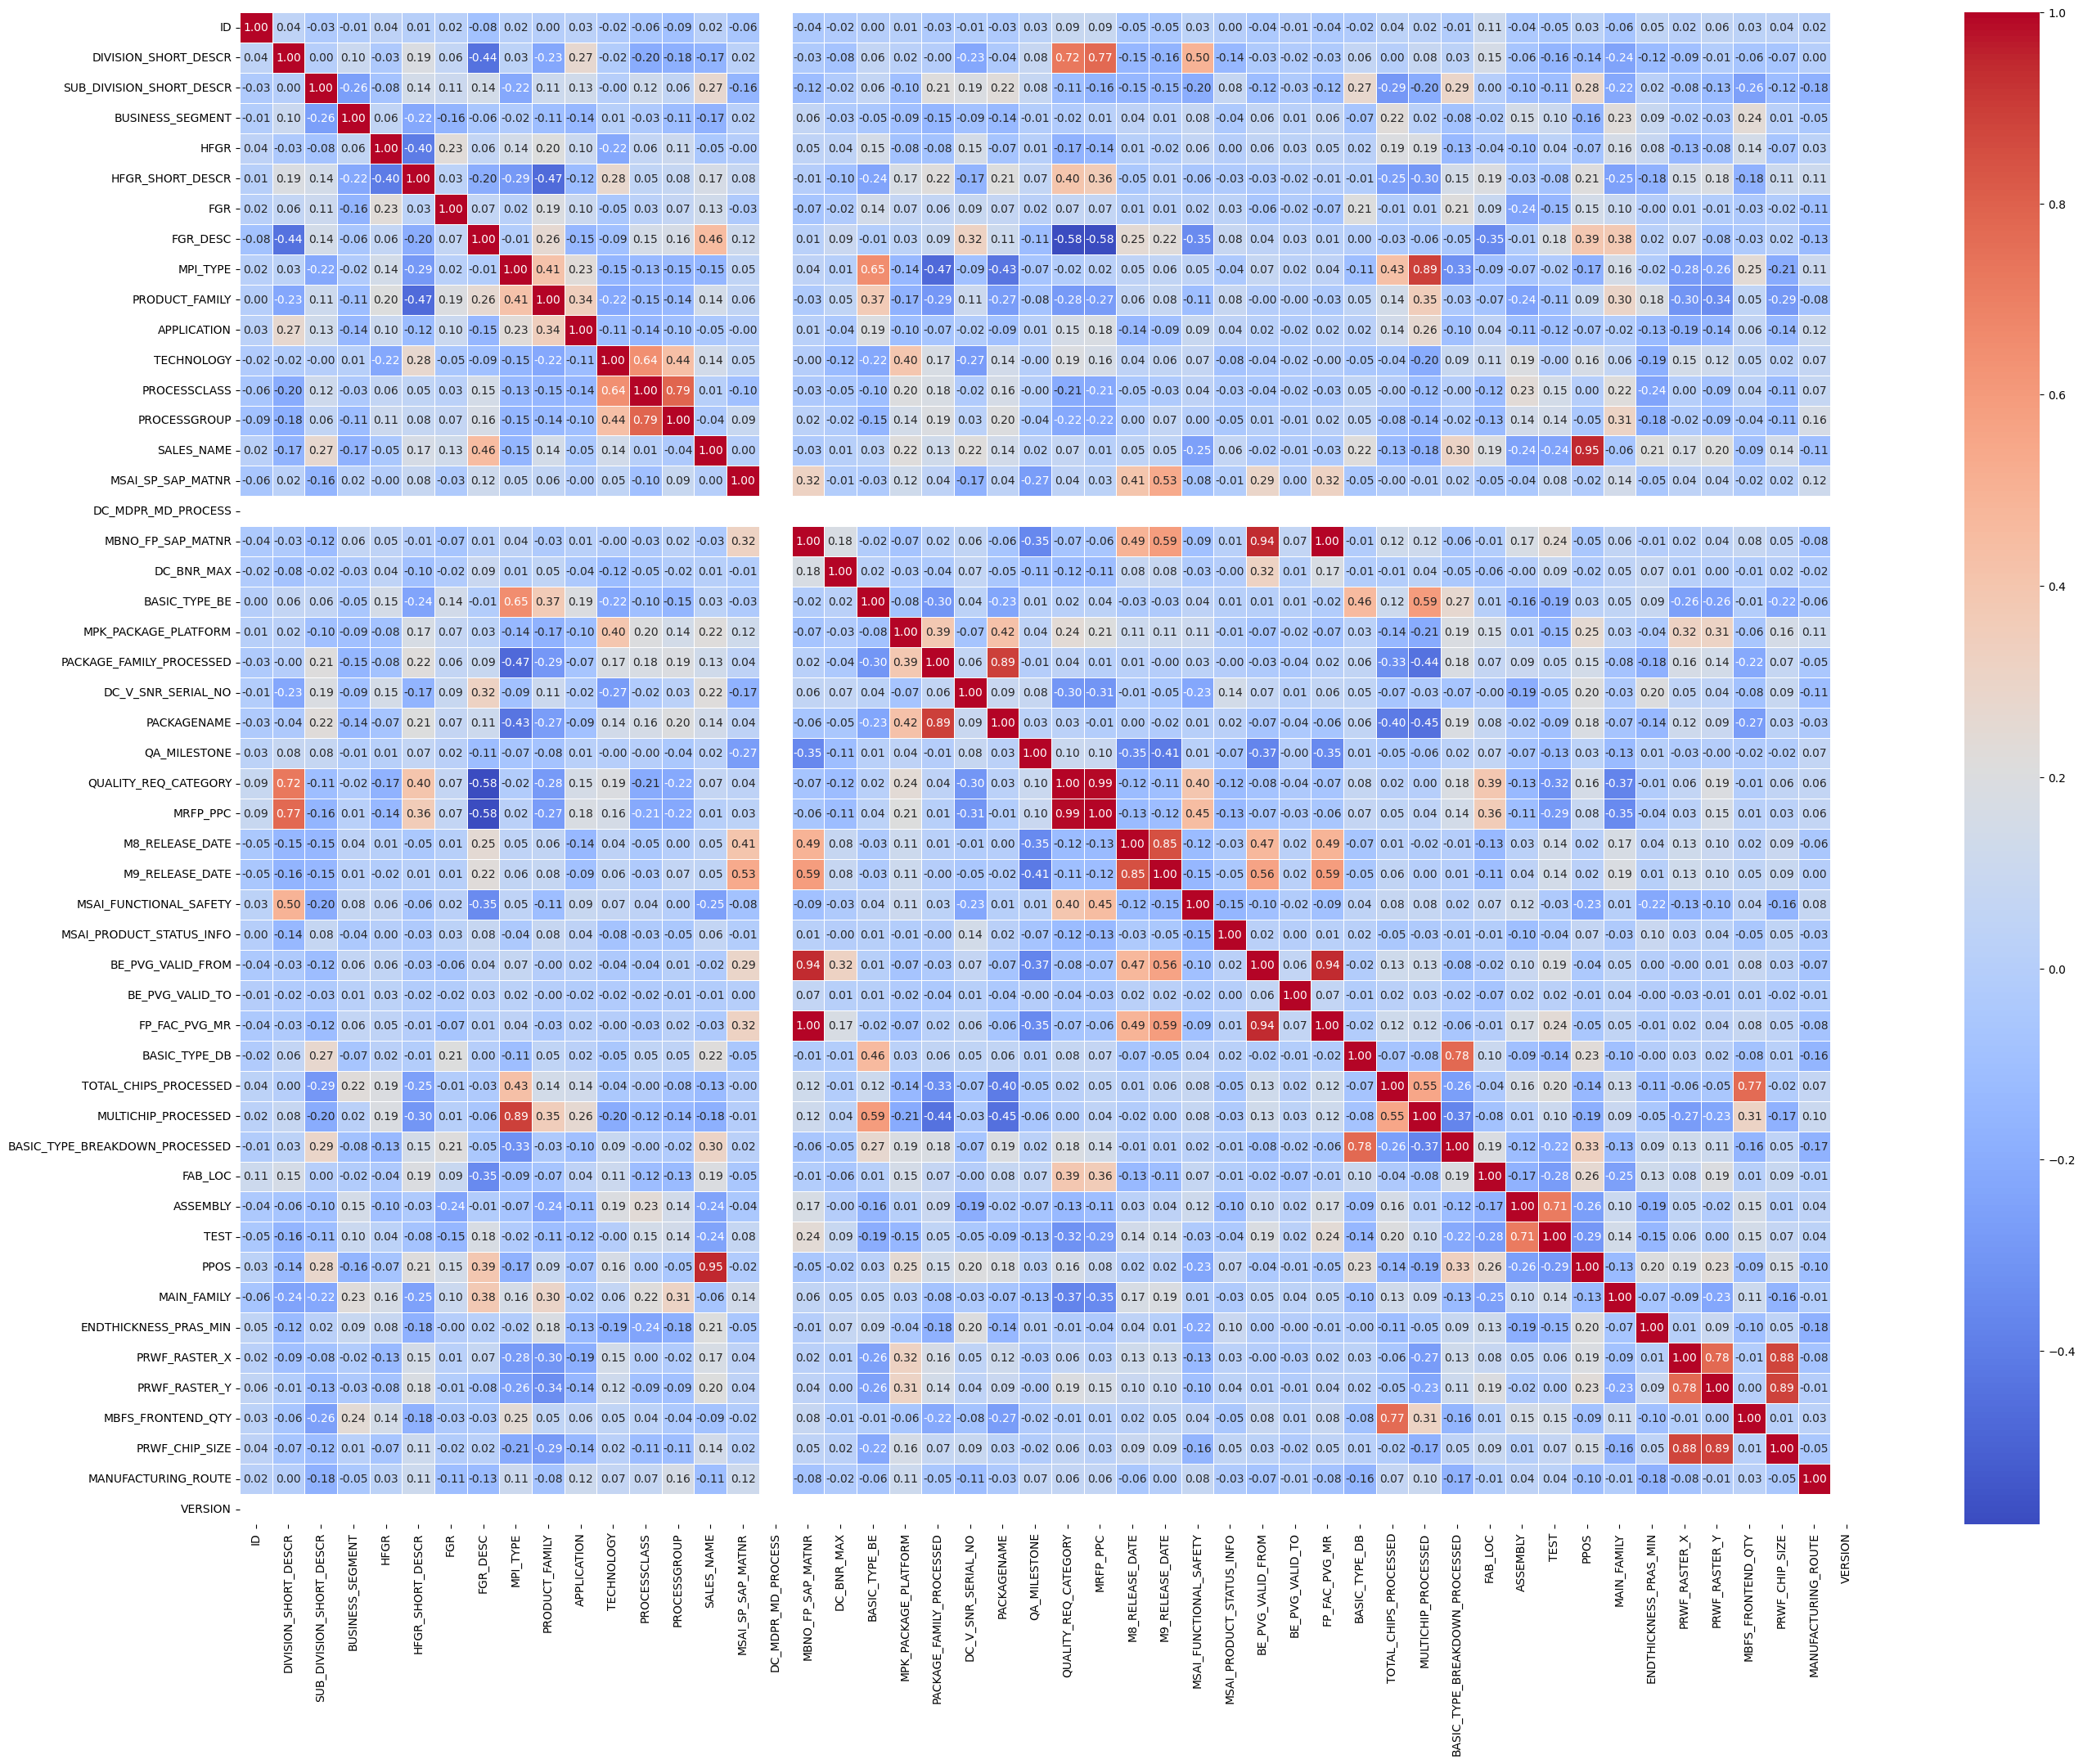

In [9]:
df_encoded.columns
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(32, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

Columnn has only One values ['DC_MDPR_MD_PROCESS', 'VERSION']


<Axes: >

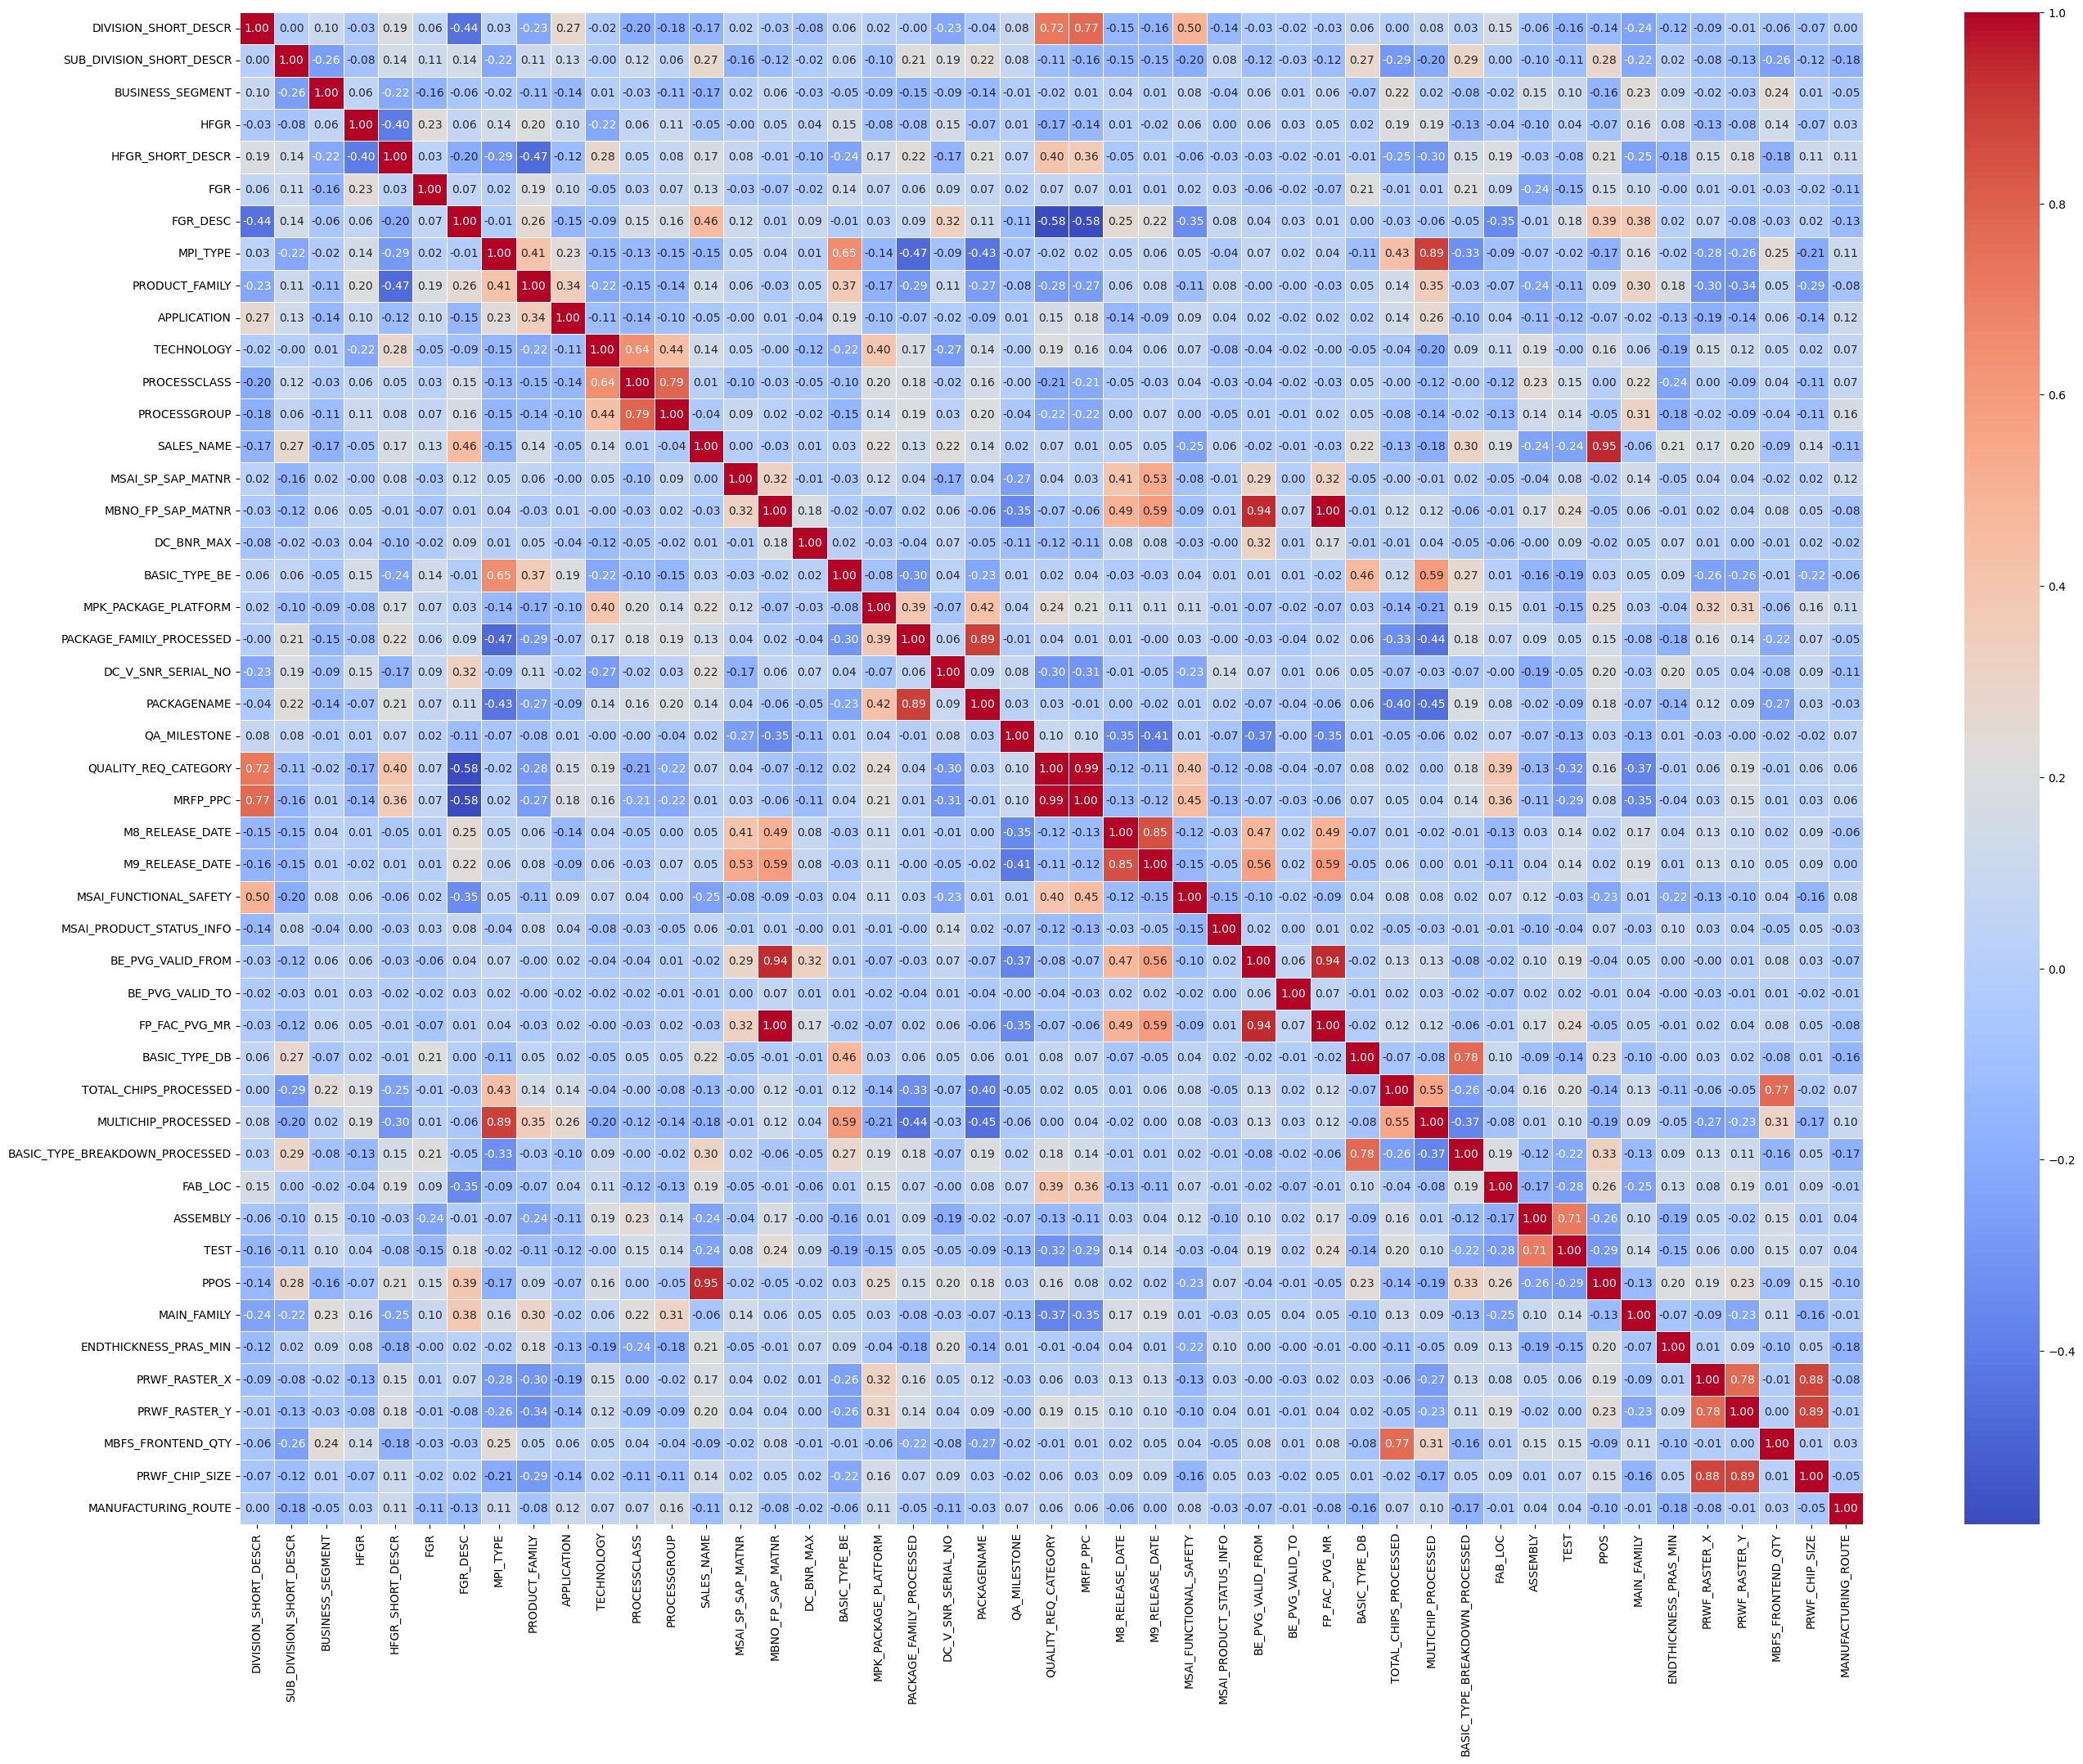

In [10]:
# Drop the column has unique values
cols_to_drop = [col for col in df_encoded.columns if len(list(df[col].unique())) == 1]
# Drop those columns
print(f'Columnn has only One values {cols_to_drop}')
cols_to_drop.append('ID')
df_cleaned = df_encoded.drop(columns=cols_to_drop)
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(32, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

Features to remove in Multicollinearity check ['MRFP_PPC', 'BE_PVG_VALID_FROM', 'FP_FAC_PVG_MR', 'PPOS']


<Axes: >

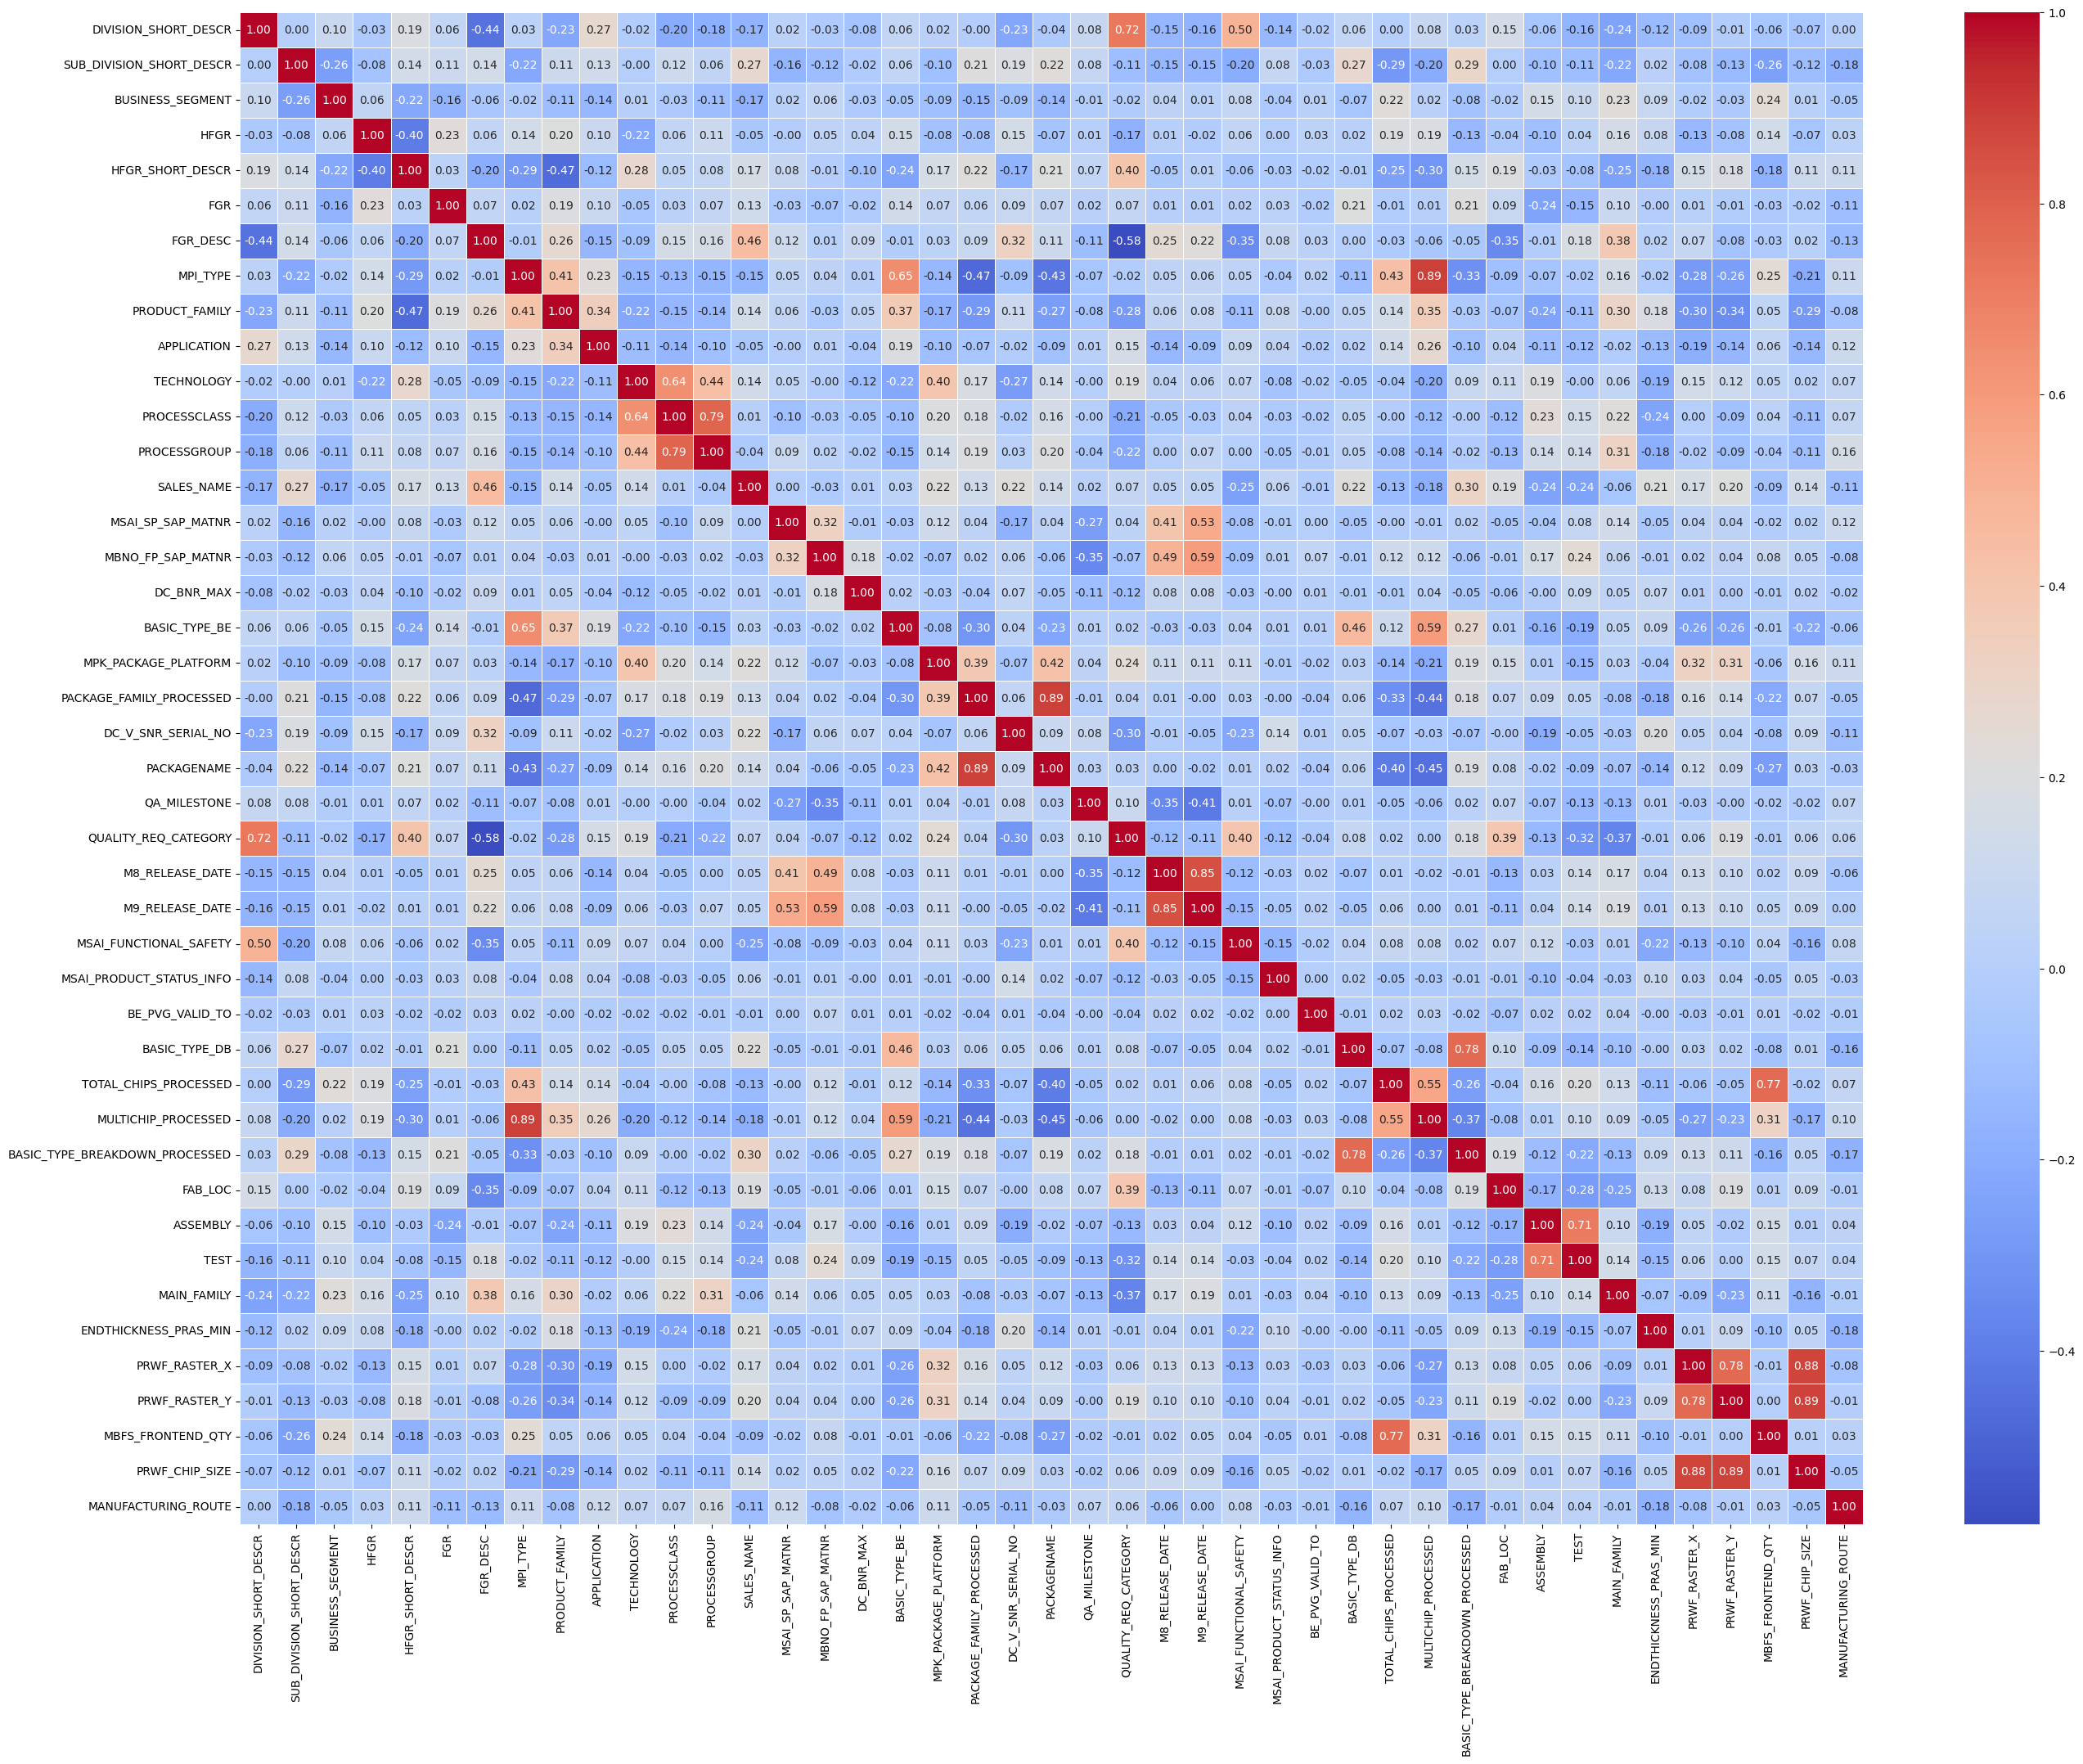

In [11]:
corr_matrix = df_cleaned.corr().abs()

# Set a threshold for correlation (e.g., 0.9)
threshold = 0.90

# Get the upper triangle of the correlation matrix (to avoid redundant checks)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation greater than the threshold
cols_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
print(f'Features to remove in Multicollinearity check {cols_to_drop}')

# Drop those columns
df_multi_collinearity = df_cleaned.drop(columns=cols_to_drop)
correlation_matrix = df_multi_collinearity.corr()
plt.figure(figsize=(32, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

In [12]:
df_multi_collinearity.columns

Index(['DIVISION_SHORT_DESCR', 'SUB_DIVISION_SHORT_DESCR', 'BUSINESS_SEGMENT',
       'HFGR', 'HFGR_SHORT_DESCR', 'FGR', 'FGR_DESC', 'MPI_TYPE',
       'PRODUCT_FAMILY', 'APPLICATION', 'TECHNOLOGY', 'PROCESSCLASS',
       'PROCESSGROUP', 'SALES_NAME', 'MSAI_SP_SAP_MATNR', 'MBNO_FP_SAP_MATNR',
       'DC_BNR_MAX', 'BASIC_TYPE_BE', 'MPK_PACKAGE_PLATFORM',
       'PACKAGE_FAMILY_PROCESSED', 'DC_V_SNR_SERIAL_NO', 'PACKAGENAME',
       'QA_MILESTONE', 'QUALITY_REQ_CATEGORY', 'M8_RELEASE_DATE',
       'M9_RELEASE_DATE', 'MSAI_FUNCTIONAL_SAFETY', 'MSAI_PRODUCT_STATUS_INFO',
       'BE_PVG_VALID_TO', 'BASIC_TYPE_DB', 'TOTAL_CHIPS_PROCESSED',
       'MULTICHIP_PROCESSED', 'BASIC_TYPE_BREAKDOWN_PROCESSED', 'FAB_LOC',
       'ASSEMBLY', 'TEST', 'MAIN_FAMILY', 'ENDTHICKNESS_PRAS_MIN',
       'PRWF_RASTER_X', 'PRWF_RASTER_Y', 'MBFS_FRONTEND_QTY', 'PRWF_CHIP_SIZE',
       'MANUFACTURING_ROUTE'],
      dtype='object')